In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


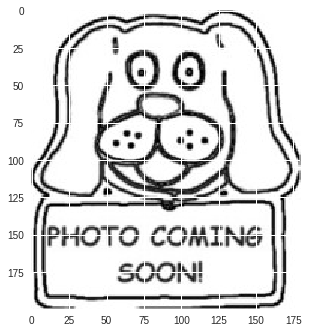

In [47]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "./drive/My Drive/Colab_Notebooks1/PetImages"
CATEGORIES = ['Dog','Cat']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)                                    #path to petImages dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  #path to each individual images  
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [48]:
print(img_array.shape) #curret shape of images

(200, 180)


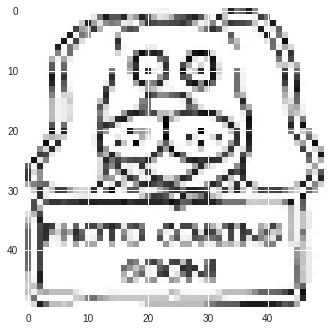

In [49]:
IMG_SIZE = 50  # resizing images

new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap="gray")

In [0]:
# making data

training_data = []
IMG_SIZE = 128  # resizing images

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)  #path to petImages dir
        class_num = CATEGORIES.index(category) # index of classes
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)  #path to each individual images
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # reshaping into (50,50)
                training_data.append([new_array, class_num])             # appending to training_data list
            except Exception as e:
                pass
            
        
create_training_data()
            

In [53]:
print(len(training_data))


24946


In [0]:
import random 

random.shuffle(training_data)

In [55]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
1
1
0
1
0
1


In [0]:
X = []  # x_traininng data
y = []  # y label output data

In [0]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # reshaping 50,50,1

In [0]:
# to use as model for further use
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()


pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()